# FTM Model

In [62]:
# Importing Python Packages

In [63]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
# Downloading data

df = pd.read_csv('ftm.csv', index_col = 'Date')
df.index = pd.to_datetime (df.index)
df.columns

Index(['Price', 'Volume', 'CirSupply', 'Velocity', 'Valuation'], dtype='object')

# Correlation Matrix

In [65]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov() 
cov_matrix

,Price,Volume,CirSupply,Velocity,Valuation
Price,0.008641,0.004817,-0.000039,0.004855,0.018351
Volume,0.004817,0.133008,-0.000062,0.133070,0.270959
CirSupply,-0.000039,-0.000062,0.000138,-0.000200,-0.000438
Velocity,0.004855,0.133070,-0.000200,0.133270,0.271397
Valuation,0.018351,0.270959,-0.000438,0.271397,0.561148


In [66]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr() 
corr_matrix

,Price,Volume,CirSupply,Velocity,Valuation
Price,1.000000,0.142073,-0.035400,0.143072,0.263524
Volume,0.142073,1.000000,-0.014462,0.999483,0.991803
CirSupply,-0.035400,-0.014462,1.000000,-0.046607,-0.049815
Velocity,0.143072,0.999483,-0.046607,1.000000,0.992431
Valuation,0.263524,0.991803,-0.049815,0.992431,1.000000


In [67]:
import statsmodels.api as sm

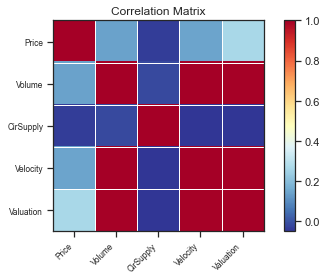

In [68]:
sm.graphics.plot_corr(corr_matrix, xnames=list(corr_matrix.columns))
plt.show()

In [69]:
val = df ['Valuation']

In [70]:
val.describe()

count    1372.000000
mean        0.021672
std         0.057613
min         0.000006
25%         0.000380
50%         0.001291
75%         0.016089
max         0.686570
Name: Valuation, dtype: float64

# Chart Visualisation

In [71]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# Download the data
data = pd.read_csv('ftm.csv',
                   parse_dates=['Date'],
                   index_col=['Date'])
data.head()

,Price,Volume,CirSupply,Velocity,Valuation
Date,,,,,
2018-11-17,0.015850,367165300,1270368580,0.289023,0.001324
2018-11-18,0.015290,360596468,1269667757,0.284008,0.001233
2018-11-19,0.010750,354285581,1270484372,0.278859,0.000836
2018-11-20,0.008891,241417163,1270018558,0.190089,0.000321
2018-11-21,0.009171,262289827,1269997274,0.206528,0.000391


In [73]:
price = df ['Price']

In [74]:
price.describe()

count    1372.000000
mean        0.419423
std         0.722420
min         0.002288
25%         0.010630
50%         0.024200
75%         0.400125
max         3.300000
Name: Price, dtype: float64

In [75]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

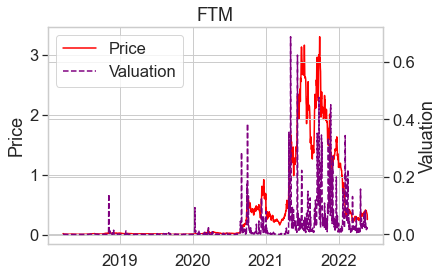

In [76]:
# Create figure and plot space
plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(6, 4))
axb = ax.twinx()

# Add x-axis and y-axis
ax.plot(data.index.values, price, color='red', label='Price')

# Set title and labels for axes
ax.set(xlabel="",
       ylabel="Price",
       title="FTM")

# Plotting on the second y-axis
axb.set_ylabel('Valuation')
axb.plot(data.index.values, val, color='purple', linestyle='--', label='Valuation')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=47))

plt.show()

# Linear Regression

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Velocity vs Valuation'}, xlabel='Velocity', ylabel='Valuation'>

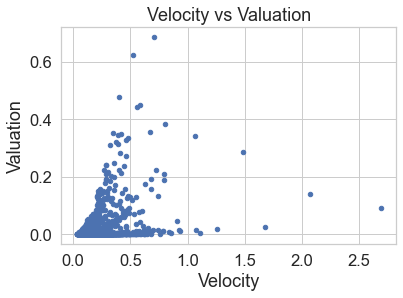

In [78]:
df.plot (kind='scatter', x='Velocity', y='Valuation', title='Velocity vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Circulation supply vs Valuation'}, xlabel='CirSupply', ylabel='Valuation'>

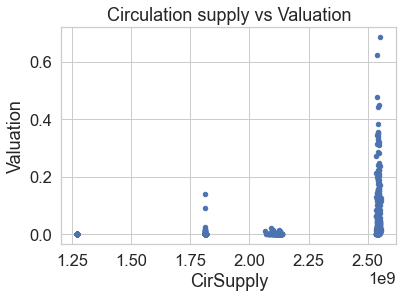

In [79]:
df.plot (kind='scatter', x='CirSupply', y='Valuation', title='Circulation supply vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Volume vs Valuation'}, xlabel='Volume', ylabel='Valuation'>

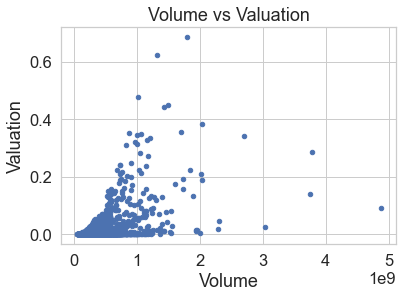

In [80]:
df.plot (kind='scatter', x='Volume', y='Valuation', title='Volume vs Valuation')

In [81]:
import sklearn.linear_model as lm

In [82]:
lr =lm.LinearRegression()

In [83]:
df.columns = df.columns.str.strip()

In [84]:
x = df.Volume       #Independent variable
y = df.Valuation        #Dependent variable

In [85]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1,1) #reshape to column

In [86]:
lr.fit (x,y)

LinearRegression()

Text(0.5, 0, 'Volume')

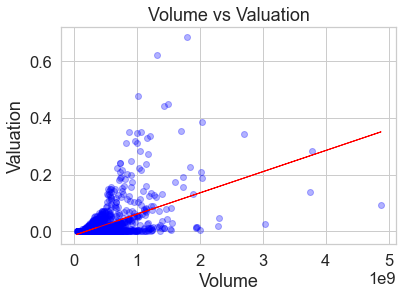

In [87]:
plt.scatter (x,y, color ='blue', alpha=0.3)
plt.plot (x, lr.predict (x), color = 'red', linewidth=1)
plt.title ('Volume vs Valuation')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

In [88]:
lr.predict (x)

array([0.01365607, 0.01316511, 0.01269343, ..., 0.03549249, 0.0285977 ,
       0.03677548])

In [89]:
R_Sq = r2_score (y, lr.predict (x))
R_Sq

0.23730072245187228

In [90]:
# Model Statistics

In [91]:
import statsmodels.formula.api as smf
model1=smf.ols(formula='Valuation~Volume',data=df).fit()
model1.params

Intercept   -1.378599e-02
Volume       7.474034e-11
dtype: float64

In [92]:
model1.pvalues

Intercept    4.129447e-10
Volume       1.139919e-82
dtype: float64

In [93]:
model1.rsquared

0.23730072245187228

In [94]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     426.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.14e-82
Time:                        00:47:45   Log-Likelihood:                 2155.2
No. Observations:                1372   AIC:                            -4306.
Df Residuals:                    1370   BIC:                            -4296.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0138      0.002     -6.295      0.000      -0.018      -0.009
Volume      7.474e-11   3.62e-12     20.646      0.000    6.76e-11    8.18e-11
==============================================================================
Omnibus:                     1301.561   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71076.550
Skew:                           4.332   Prob(JB):                         0.00
Kurtosis:                      37.180   Cond. No.                     9.75e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
val_pred=model1.predict(pd.DataFrame(df['Volume']))
val_pred

Date
2018-11-17    0.013656
2018-11-18    0.013165
2018-11-19    0.012693
2018-11-20    0.004258
2018-11-21    0.005818
                ...   
2022-08-15    0.035365
2022-08-16    0.033527
2022-08-17    0.035492
2022-08-18    0.028598
2022-08-19    0.036775
Length: 1372, dtype: float64

In [96]:
df['val_pred']=-1.301119e-01*df['Volume']+3.395391e-08
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/693)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(110750784.31147352, 0.021671514139941693, 5110431306.105845)

# Multiple Linear Regression

In [97]:
import statsmodels.formula.api as smf
model2=smf.ols(formula='Valuation~Volume+Velocity',data=df).fit()
model2.params

Intercept   -8.881903e-03
Volume       2.992273e-10
Velocity    -4.949252e-01
dtype: float64

In [98]:
val_pred=model2.predict(df[['Volume','Velocity']])
val_pred

Date
2018-11-17   -0.042061
2018-11-18   -0.041545
2018-11-19   -0.040884
2018-11-20   -0.030723
2018-11-21   -0.032614
                ...   
2022-08-15    0.060000
2022-08-16    0.057425
2022-08-17    0.060184
2022-08-18    0.050524
2022-08-19    0.061977
Length: 1372, dtype: float64

In [99]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     514.7
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.10e-167
Time:                        00:47:53   Log-Likelihood:                 2354.0
No. Observations:                1372   AIC:                            -4702.
Df Residuals:                    1369   BIC:                            -4686.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0089      0.002     -4.653      0.000      -0.013      -0.005
Volume      2.992e-10   1.09e-11     27.393      0.000    2.78e-10    3.21e-10
Velocity      -0.4949      0.023    -21.452      0.000      -0.540      -0.450
==============================================================================
Omnibus:                     1352.678   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88294.811
Skew:                           4.548   Prob(JB):                         0.00
Kurtosis:                      41.233   Cond. No.                     1.19e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
import numpy as np
df['val_pred']=-3.726460e-01 + 2.499669e-08*df['Volume'] + 3.684614e+00*df['Velocity']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(22.300326151462798, 0.021671514139941693, 1029.0156011924507)

In [101]:
import statsmodels.formula.api as smf
model3=smf.ols(formula='Valuation~Volume+Velocity+CirSupply',data=df).fit()
model3.params

Intercept    4.851232e-02
Volume       3.878029e-10
Velocity    -6.763430e-01
CirSupply   -2.764768e-11
dtype: float64

In [102]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     368.4
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.42e-175
Time:                        00:47:57   Log-Likelihood:                 2375.7
No. Observations:                1372   AIC:                            -4743.
Df Residuals:                    1368   BIC:                            -4722.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0485      0.009      5.465      0.000       0.031       0.066
Volume      3.878e-10   1.72e-11     22.581      0.000    3.54e-10    4.21e-10
Velocity      -0.6763      0.036    -18.993      0.000      -0.746      -0.606
CirSupply  -2.765e-11   4.18e-12     -6.616      0.000   -3.58e-11   -1.94e-11
==============================================================================
Omnibus:                     1310.801   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82617.502
Skew:                           4.322   Prob(JB):                         0.00
Kurtosis:                      40.020   Cond. No.                     6.95e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
val_pred=model3.predict(df[['Volume','Velocity','CirSupply']])
val_pred

Date
2018-11-17   -0.039701
2018-11-18   -0.038838
2018-11-19   -0.037825
2018-11-20   -0.021544
2018-11-21   -0.024567
                ...   
2022-08-15    0.058404
2022-08-16    0.055404
2022-08-17    0.058617
2022-08-18    0.047361
2022-08-19    0.060707
Length: 1372, dtype: float64

In [104]:
import numpy as np
df['val_pred']=-0.3919 + 2.436e-08*df['Volume'] + 3.7717*df['Velocity'] + 1.105e-10*df['CirSupply']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(22.036075512552987, 0.021671514139941693, 1016.8221458942451)

In [105]:
model4=smf.ols(formula='Volume~Velocity+CirSupply',data=df).fit()
rsquared=model4.rsquared 
VIF=1/(1-rsquared)
VIF

30.988829757402065

# Polynomial Regression

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [107]:
x=df.Volume
y=df.Valuation

In [108]:
degree=2
model5=make_pipeline (PolynomialFeatures (degree), lr)

In [109]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1, 1) #reshape to column

In [110]:
model5.fit (x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Text(0.5, 8.959999999999994, 'Volume')

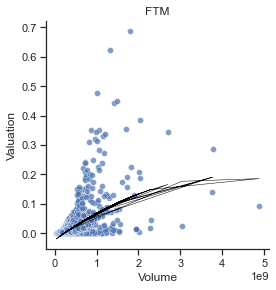

In [111]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="Volume", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.plot (x, model5.predict (x), color='black', linewidth=.5)
plt.title ('FTM')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

Text(0.5, 8.959999999999994, 'Circulation Supply')

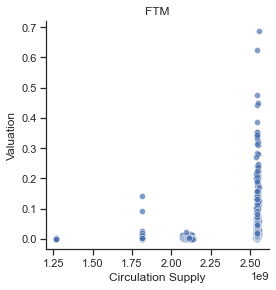

In [112]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="CirSupply", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.title ('FTM')
plt.ylabel ('Valuation')
plt.xlabel ('Circulation Supply')